# Zipcode data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# data_path = 'zip.train'
# data = open('zip.train', 'r')
# txt = data.readline()
# data.close()

# Load the file with training data
file = pd.read_csv('zip.train', ' ', header=None)    
print(file.head())

   0    1    2    3      4      5      6      7      8      9    ...    248  \
0  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862  ...  0.823   
1  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ... -0.671   
2  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ... -1.000   
3  7.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ...  1.000   
4  3.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...  0.639   

     249    250    251    252    253    254    255  256  257  
0  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  NaN  
1 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  NaN  
2 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  NaN  
3  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  NaN  
4  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  NaN  

[5 rows x 258 columns]


In [2]:
# Create feature vector
X = pd.DataFrame()
count = 0

for i in file.columns:
    X.insert(count, i, file[i])
    count += 1
X = X.drop([257], axis=1)
# print(X[:5])

In [3]:
# Check the shape of your inputs
Y = X[[0]]
print(X.shape)
print(Y.shape)

(7291, 257)
(7291, 1)


In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create Linear model
model = linear_model.LogisticRegression(random_state=0) # Logistic regression

In [5]:
# Fit the model
model.fit(X, Y.values.ravel())

/home/tomas/anaconda3/envs/deep-learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [6]:
# Make a prediction
Y_pred = model.predict(X)

In [7]:
# Print the results
print(f'Score: {model.score(X,Y)}')
print(f'Intercept: {model.intercept_}')
print(f'Mean squared error (MSE): {mean_squared_error(Y, Y_pred)}')
print(f'Coefficient of determination (R^2): {r2_score(Y, Y_pred)}')

Score: 0.9998628446029352
Intercept: [ 0.73249587 -0.02397473  1.08408517  0.3639647   0.08624165  0.34850141
 -0.66613465 -0.33878537 -0.4840543  -1.10233973]
Mean squared error (MSE): 0.0001371553970648745
Coefficient of determination (R^2): 0.9999847216335701


## K-nearest neighbors classification

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Create classification model and fit it
cls = KNeighborsClassifier(n_neighbors=7)
cls.fit(X, Y.values.ravel()) 

KNeighborsClassifier(n_neighbors=7)

In [ ]:
for i in range(1, 16):
    print(f"KNN n_neighbors = {i}")
    cls = KNeighborsClassifier(n_neighbors=i)
    cls.fit(X, Y.values.ravel())
    cls_pred = cls.predict(X)
    score = cls.score(X, Y)
    print(f"Acc score: {score}")

KNN n_neighbors = 1
Acc score: 1.0
KNN n_neighbors = 2
Acc score: 0.9916335207790427
KNN n_neighbors = 3
Acc score: 0.993416540940886
KNN n_neighbors = 4
Acc score: 0.9916335207790427
KNN n_neighbors = 5
Acc score: 0.9905362776025236
KNN n_neighbors = 6
Acc score: 0.9877931696612262
KNN n_neighbors = 7
Acc score: 0.9873817034700315
KNN n_neighbors = 8
Acc score: 0.9862844602935126
KNN n_neighbors = 9
Acc score: 0.9854615279111233
KNN n_neighbors = 10
Acc score: 0.9839528185434097
KNN n_neighbors = 11
Acc score: 0.9835413523522151
KNN n_neighbors = 12
Acc score: 0.9832670415580853
KNN n_neighbors = 13
Acc score: 0.9828555753668907
KNN n_neighbors = 14


In [9]:
print(Y.values.ravel())

[6. 5. 4. ... 3. 0. 1.]


In [10]:
# Make a prediction
cls_pred = cls.predict(X)

In [11]:
# Check the score
score = cls.score(X, Y)
prob = cls.predict_proba(X)
print(f"Acc score: {score}")
print(f"Probability: {prob}")

Acc score: 0.9873817034700315
Probability: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
a = cls.kneighbors_graph(X)
a.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Test data

In [13]:
# Load the file with test data
test_file = pd.read_csv('zip.test', ' ', header=None)
Y_test_file = test_file[[0]]

In [14]:
# Check the shape of inputs
print(f"Test file shape: {test_file.shape}")
print(f"Y shape: {Y_test_file.shape}")

Test file shape: (2007, 257)
Y shape: (2007, 1)


## Logistic regression

In [15]:
# Make a prediction
test_data_pred = model.predict(test_file)

In [16]:
# Print the results
print(f'Score: {model.score(test_file, Y_test_file)}')
print(f'Intercept: {model.intercept_}')
print(f'Mean squared error (MSE): {mean_squared_error(Y_test_file, test_data_pred)}')
print(f'Coefficient of determination (R^2): {r2_score(Y_test_file, test_data_pred)}')

Score: 0.9646238166417539
Intercept: [ 0.73249587 -0.02397473  1.08408517  0.3639647   0.08624165  0.34850141
 -0.66613465 -0.33878537 -0.4840543  -1.10233973]
Mean squared error (MSE): 0.16591928251121077
Coefficient of determination (R^2): 0.981780536168797


## Classification

In [17]:
# Make a prediction
test_data_classification = cls.predict(test_file)

In [18]:
# Reshape the data
# test_data_classification = test_data_classification.reshape(-1, 1)
print(test_data_classification[:5])

[9. 6. 3. 6. 6.]


In [19]:
# Check the shape of data
print(f"Test classification data shape: {test_file.shape}")
print(f"Y shape: {Y_test_file.shape}")

Test classification data shape: (2007, 257)
Y shape: (2007, 1)


In [20]:
# Print the score
score_class = cls.score(test_file, Y_test_file)
prob_class = cls.predict_proba(test_file)
print(f"Acc score: {score_class}")
print(f"Probability: {prob_class}")

Acc score: 0.9671150971599403
Probability: [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


## PCA

I create PCA model with all the features to see how the variance change with different number of components.

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

# Create PCA model
pca = PCA()

x_norm = normalize(X)

# Fit and transform the model
X_new_train = pca.fit(x_norm)

In [76]:
print("PCA score :", pca.score(x_norm))
print("PCA noise variance :",pca.noise_variance_)

PCA score : 677.4607130468963
PCA noise variance : 0.0


Text(0, 0.5, 'Variance explained')

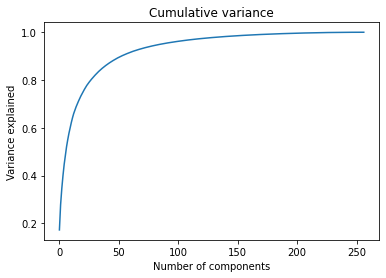

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')

In [78]:
cumvar = np.cumsum(pca.explained_variance_ratio_)

In [79]:
cumvar[50]

0.8950805247657252

I picked 50 components, created a new PCA, fit and transform the input data.

I don't think this is the correct approach, but I want to test the accuracy with lower data dimensions. So I split the data, create a new classifier, train it, and test it.

In [80]:
# Transform the data to 50 dimension
pca_50 = PCA(50)
X_new_train = pca_50.fit_transform(X)

# Split into train and test data
X_pca_train = X_new_train[:5291]
X_pca_test = X_new_train[5291:]
Y_pca_train = Y[:5291]
Y_pca_test = Y[5291:]

In [81]:
print(f"X train data shape: {X_pca_train.shape}, X test data shape: {X_pca_test.shape}")
print(f"Y train data shape: {Y_pca_train.shape},Y test data shape: {Y_pca_test.shape}")

X train data shape: (5291, 50), X test data shape: (2000, 50)
Y train data shape: (5291, 1),Y test data shape: (2000, 1)


In [82]:
# Create new KNN Model and fit it
pca_cls = KNeighborsClassifier(n_neighbors=7)
pca_cls.fit(X_pca_train, Y_pca_train.values.ravel())

KNeighborsClassifier(n_neighbors=7)

In [83]:
# Make a prediction
pca_predict = pca_cls.predict(X_pca_test)

In [84]:
score_class_pca = pca_cls.score(X_pca_test, Y_pca_test)
print(f"Score: {score_class_pca}")

Score: 0.9835
